In [3]:
# Tensorflow_Object_Detection is the module's root folder
%cd '/Tensorflow_Object_Detection'

/content/drive/MyDrive/Tensorflow


In [4]:
# Install the Object Detection API and compile proto files
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/drive/MyDrive/Tensorflow/models/research
  Using cached tensorflow-2.5.0-cp37-cp37m-manylinux2010_x86_64.whl (454.3 MB)
  Using cached h5py-3.1.0-cp37-cp37m-manylinux1_x86_64.whl (4.0 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1660307 sha256=3f9066eac310278eab49271c09b60017b8555b881e386b21899a66e151f0b421
  Stored in directory: /tmp/pip-ephem-wheel-cache-3hyf192i/wheels/2d/6e/f8/73c45941201950161ed0aa9c2eadcd4278d94c23dbd483bc81
Successfully built object-detection
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Attempting uninstall: tensorboard
    Found existing installation: 

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [5]:
import io
import os
import scipy.misc
import numpy as np
import six
import time

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import visualization_utils as viz_utils

%matplotlib inline

In [6]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Load the COCO Label Map
category_index = {
    1: {'id': 1, 'name': 'person'},
    2: {'id': 2, 'name': 'car'}
}

In [7]:
# Loading model
model_path = 'Tensorflow_Object_Detection/data/my_model/saved_model/'
start_time = time.time()
tf.keras.backend.clear_session()
detect_fn = tf.saved_model.load(model_path)
end_time = time.time()
elapsed_time = end_time - start_time
print('Elapsed time: ' + str(elapsed_time) + 's')

Elapsed time: 33.983054637908936s


Elapsed time: 1.4736944039662678 second per image


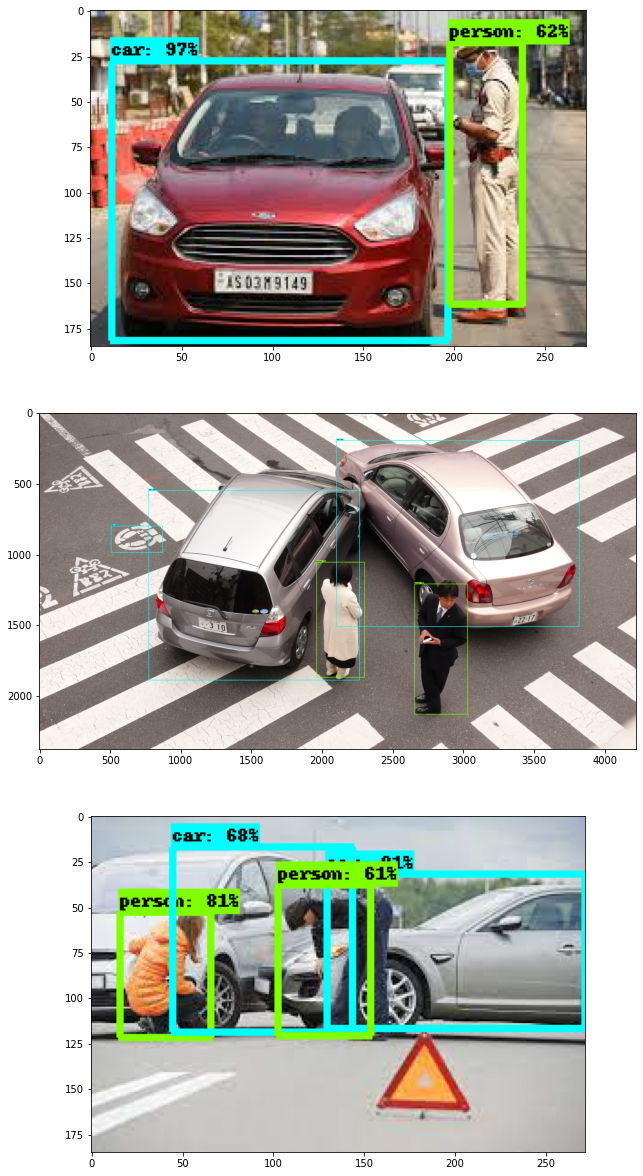

In [9]:
# detecting and localizing test images
import time
# image_dir is the directory path where the test images are stored
image_dir = 'Tensorflow_Object_Detection/test_images'

elapsed = []
for i in range(3):
  image_path = os.path.join(image_dir, 'image' + str(i + 1) + '.jpg')
  image_np = load_image_into_numpy_array(image_path)
  input_tensor = np.expand_dims(image_np, 0)
  start_time = time.time()
  detections = detect_fn(input_tensor)
  end_time = time.time()
  elapsed.append(end_time - start_time)

  plt.rcParams['figure.figsize'] = [42, 21]
  label_id_offset = 1
  image_np_with_detections = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.40,
        agnostic_mode=False)
  plt.subplot(3, 1, i+1)
  plt.imshow(image_np_with_detections)

mean_elapsed = sum(elapsed) / float(len(elapsed))
print('Elapsed time: ' + str(mean_elapsed) + ' second per image')